### Linear Regression Analysis

In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the mtcars Data

In [3]:
df = pd.read_csv('Datasets/mtcars.csv')
df.head()

,Model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Basic EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [6]:
df.isnull().sum()

Model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [7]:
df.shape

(32, 12)

In [8]:
df.columns

Index(['Model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

### Visualization

**Pairplot to study the distributions between independent variables**

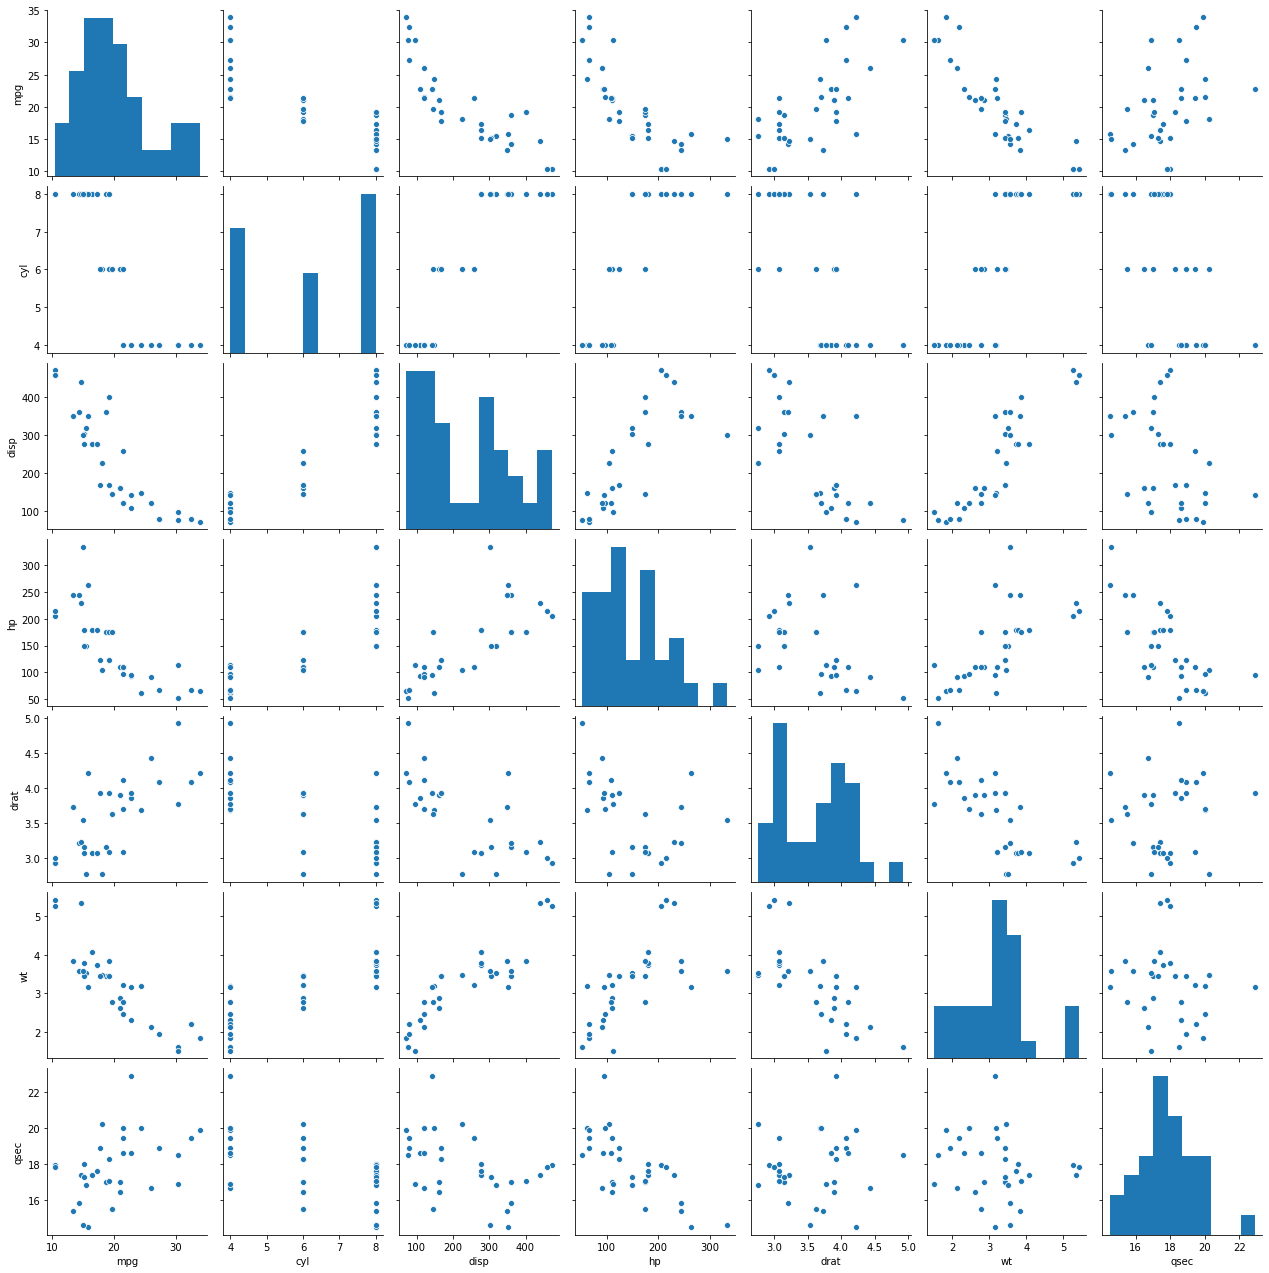

In [10]:
sns.pairplot(df.iloc[:,1:8])

- MPG shows a linear dependency with the variables DISP and HP.
- MPG shows a non-linear dependency with all the other independent variables.

**Heatmap for correlation**

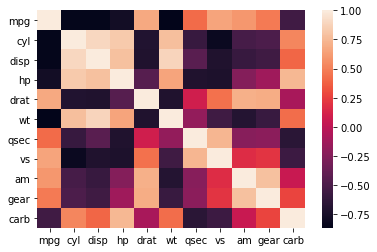

In [11]:
sns.heatmap(df.corr())

- MPG has high negetive correlation with cyl, disp, carb and hp.
- MPG has high positive correlation with drat, vs and arm.

**Heatmap for null values**

In [13]:
df.replace(['?',' ', '-'], np.nan, inplace=True)

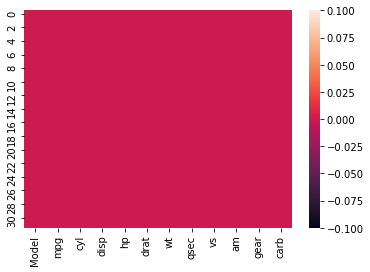

In [14]:
sns.heatmap(df.isnull())

There are no null or missing values in this dataset.

**Boxplot to identify outliers**

Text(0.5, 1.0, 'qsec')

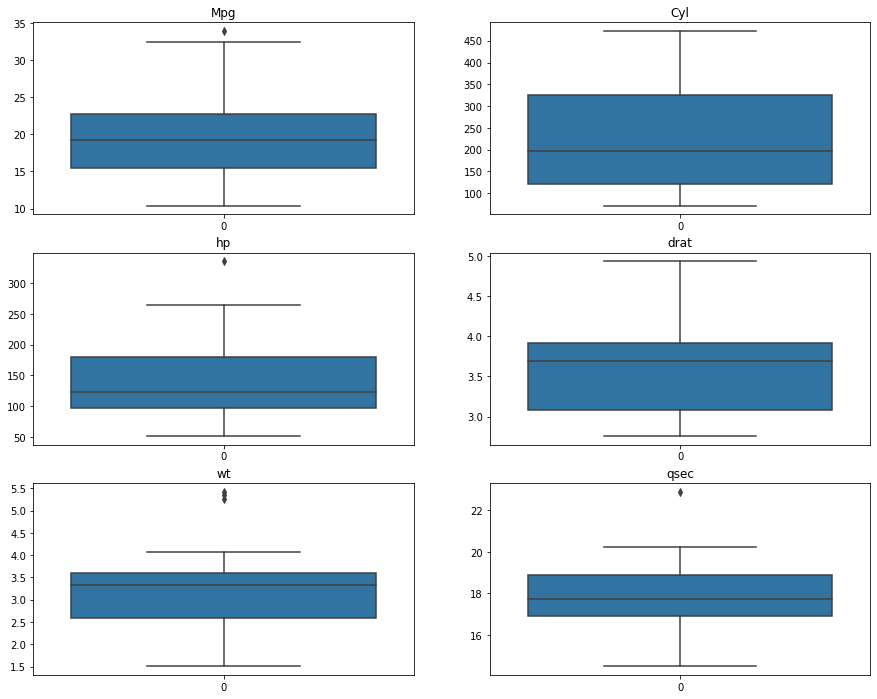

In [20]:
fig, axs = plt.subplots(3, 2, figsize=(15,12))

sns.boxplot(ax=axs[0,0], data=df["mpg"]).set_title('Mpg')
sns.boxplot(ax=axs[0,1], data=df["disp"]).set_title('Cyl')
sns.boxplot(ax=axs[1,0], data=df["hp"]).set_title('hp')
sns.boxplot(ax=axs[1,1], data=df["drat"]).set_title('drat')
sns.boxplot(ax=axs[2,0], data=df["wt"]).set_title('wt')
sns.boxplot(ax=axs[2,1], data=df["qsec"]).set_title('qsec')

The boxplots show that the variables MPG, HP, WT and QSEC have a presence of outliers.

### Building a Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [22]:
df.columns

Index(['Model', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am',
       'gear', 'carb'],
      dtype='object')

In [23]:
x = df.iloc[:,2:]
y = df.iloc[:,1]

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train, y_train)

LinearRegression()

In [27]:
pred = model.predict(x_test)
pred

array([20.6803846 , 11.02397777, 15.84539003, 27.14848466, 27.52299514,
       18.5744146 , 15.37933749, 27.48920606, 15.25153096, 22.51589448,
       16.9707175 ])

### Model Evaluation

In [28]:
coeff_df = pd.DataFrame(model.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
cyl,-0.671012
disp,0.018642
hp,-0.016009
drat,0.700918
wt,-4.613932
qsec,1.557128
vs,-1.384842
am,1.585910
gear,1.024951
carb,0.421463


The coefficients dataframe denotes the contribution of each variable towards the change in the value of mpg. For example, it shows that with each additional cylinder, the mpg of the vehicle decreases by approximately 0.671 units, and with with every additional carbonator, the mpg increases by 0.421 units.

**Scatter plot for Actual VS Predicted values**

Text(0, 0.5, 'Predicted MPG')

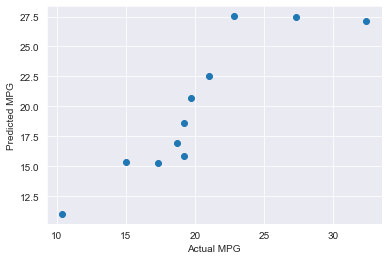

In [30]:
sns.set_style('darkgrid')
plt.scatter(y_test,pred)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")

The above scatter plot shows that the predicted values of MPG are pretty close to the actual values, and hence, accurate, except those values that are predicted to be higher than 25. This may be a result of outliers present in the dataset.

**Residual Histogram**

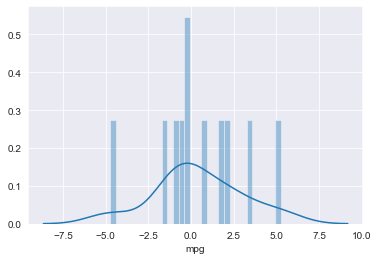

In [31]:
sns.distplot((y_test-pred),bins=30)

In [34]:
print('Mean of residuals: ', round(np.mean(y_test - pred),3))

Mean of residuals:  0.418


In [35]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('R^2 Score:', round(metrics.r2_score(y_test, pred)*100),"%")

Mean Absolute Error: 1.9473870729166571
Mean Squared Error: 6.5949671963796614
R^2 Score: 79.0 %


In [40]:
print('Accuracy over training data: ', round(model.score(x_train, y_train)*100,2), "%")

Accuracy over training data:  87.35 %


**Conclusion:** The accuracy of the Linear Regression model over test data (R^2 score) is 79%, while its accuracy over training data is 87.35%, which suggests that the model is overfitting on train data. A possible reason for this could be that the dataset is too small to accurately predict the values of MPG using the training data. A larger dataset would be required to construct a more fitting train-test split of the data, and reduce overfitting of the model.